<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/7_1_Molecular_representation_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Molecular fingerprints**
---
Made by: Brayan Raziel Cedillo González and Karen Pelcastre

Contact: brayanraziel1997@gmail.com

**Last Update:** March 2025


#Contents


---

>[Molecular fingerprints](#scrollTo=-5Kw6AfvgYEw)

>[Contents](#scrollTo=euW-c7DcQVw1)

>[Introduction](#scrollTo=L7lw_g9CQXzL)

>[1. Libraries: import and install](#scrollTo=89t9vQ6rrFsr)

>[2. Representations](#scrollTo=h_5EZPtAKxL7)

>>[2.1 - Graphs](#scrollTo=yqB7qKb6Kn7O)

>>>[2.1.1 - two-dimensional](#scrollTo=5DRd3oDEK4Ij)

>>>[2.1.2 - Three-dimensional](#scrollTo=YcsJABDdK9Vw)

>>[2.2- Fingerprints](#scrollTo=qBlvSVxPr8q6)

>>>[2.2.1.    Substructure or dictionary based](#scrollTo=rrhuRqKqNnZ0)

>>>>[A - MACCS (Molecular ACCess System) Keys](#scrollTo=ug--zlJ9sme2)

>>>>>[A.1 - Visualization of the molecular fingerprint](#scrollTo=4XwWh6d-t-qT)

>>>>>>[Bar chart or histogram](#scrollTo=4XwWh6d-t-qT)

>>>>[B - PubChem](#scrollTo=3AvoWE7Vwry8)

>>>[2.2.2 - Topological or path based](#scrollTo=a1xkab7fw7_W)

>>>>[Circular fingerprints](#scrollTo=uX_YM0w4x0P_)

>>>>[A - ECFP, Extended-Connectivity Fingerprints](#scrollTo=v90O8YvverIR)

>>>>[B - FCFP, Functional-Class Fingerprints](#scrollTo=XnKQO92ae2Qk)

>[3. Exercise with a database](#scrollTo=3Xg4Uj-uBVVe)

>[For more information:](#scrollTo=bjFq2uYwlZeA)



#Introduction
---

The molecular fingerprints are a type of molecular structure that encodes the structure of a molecule in a bits sequence in a way that we can computationally compare and analyze it.

Most of the methods use only two-dimensional molecular graphs and are called two-dimensional molecular fingerprints. However, some methods can store information in three-dimensional , more notably pharmacophoric molecular fingerprints.
There are multiple types of molecular fingerprints, including the structure-based fingerprints, such as “MACCS keys”, and topological fingerprints, that encodes the general topology or connectivity of the molecule without explicitly coding specific substructures.

In general, fingerprints based on **structures** are created by encoding the presence or absence of specific substructures in the molecule, while **topological** fingerprints encode the connectivity or general shape of the molecule. The topological fingerprints can be subdivided into:
Fingerprints based on routes that encode the presence or absence of particular routes in the graphic representation of the molecule.
Circular fingerprints that encode the presence or absence of circular substructures or particular patterns.

The fingerprints are typically used to calculate the similarity between two molecules. The above can be used to identify molecules that are structurally similar and can have similar biological activity, which makes them possible drug candidates. The similarity values are calculated by comparing fingerprints of two molecules and obtaining similarity values.

The use of molecular fingerprints in chemoinformatics has many advantages, including the capability to represent complex molecular structures in a computationally efficient way and the ability to compare large molecular databases in a quick and precise way. However, also there are some limitations in the use of fingerprints, like the incapacity of capturing all the aspects of molecular similarity and the potential of getting false positives or false negatives in the similarity calculations.

In general, the molecular fingerprints are a useful tool in chemoinformatics, and they are widely used in drug discovery, material science and other research fields. The selection of the type of fingerprints will be based on the specific application and the properties of the molecule that want to be analyzed.



Note: The generation of fingerprints in this script consider the SMILES of the *aspirin* as input.

<a name='0'></a>

# *1. Libraries: import and install*
---

In [ ]:
import time
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        pbar.update(30)
        !pip install rdkit
        !pip install PubChemPy
        !pip install kora py3Dmol
        import kora.install.rdkit
        import py3Dmol

        pbar.update(30)
        import pandas as pd
        from rdkit import Chem, DataStructs, RDConfig
        from rdkit.Chem import MACCSkeys, AllChem, RDKFingerprint, Draw, Descriptors, PandasTools, Pharm2D
        from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate
        import pubchempy as pcp
        import matplotlib.pyplot as plt
        import numpy as np
        pbar.update(40)

  0%|          | 0/100 [00:00<?, ?it/s]

<a name='2'></a>

# *2. Representations*
---

<a name='2.1'></a>
## 2.1 - Graphs

<a name='2.1.1'></a>
### 2.1.1 - two-dimensional

Visualize a single molecule

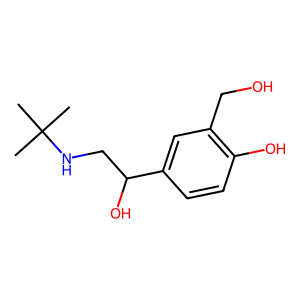

In [ ]:
aspirin_smiles='CC(C)(C)NCC(C1=CC(=C(C=C1)O)CO)O'
mol = Chem.MolFromSmiles(aspirin_smiles)
img = Draw.MolToImage(mol) # Generate a image of the molecule
img.save("mol_image.png")  # Saves image in png
img #Displays the image

Visualize a list of molecules

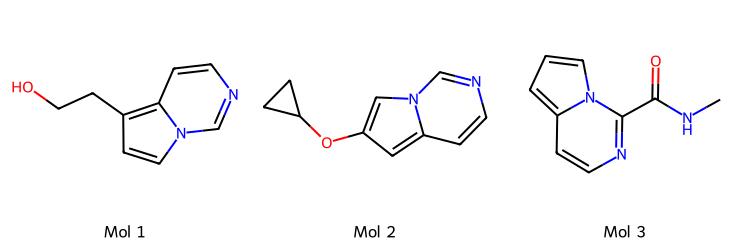

In [ ]:
list_of_smiles = ['OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12']
mol_list = [Chem.MolFromSmiles(smi) for smi in list_of_smiles]
for mol in mol_list:
  tmp=AllChem.Compute2DCoords(mol)

# Asign names to the molecules (optional step, if they are not defined)
for idx, mol in enumerate(mol_list):
    if mol is not None:  # Avoids mistakes if there's any invalid SMILES
        mol.SetProp("_Name", f"Mol {idx+1}")

#Visualization settings
img_grid = Draw.MolsToGridImage(
    mol_list,
    molsPerRow=3,
    subImgSize=(250, 250),
    legends=[mol.GetProp("_Name") if mol is not None else "Unknown" for mol in mol_list]
)

img_grid #Displays the image


In [ ]:
# Saves image in png
img.save("mol_grid.png")

### 2.1.2 - Three-dimensional

In [ ]:
def show_3d_figure(smi, style='stick'): #'sphere'
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=200, height=200)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()

In [ ]:
# example
for i in list_of_smiles:
  show_3d_figure(i)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<a name='2.2'></a>

## 2.2- Fingerprints

<a name='2.2.1'></a>

### 2.2.1.	Substructure or dictionary based


Substructure based signatures are generated through the encode of the presence or absence of a specific characteristic or substructure on a molecule from a given list of structural keys (independent from the molecule). This involves defining a set of molecular fragments or substructures that are considered important or relevant for a specific action, and then, they generate a binary signature that encodes if any of these substructures is present or absent in the molecule. Molecular fingerprints based on the most common substructures are:

<a name='2.2.1A'></a>

#### **A - MACCS (Molecular ACCess System) Keys**
They come in two variants of different bit lengths, one with **960** and another with **166** structural keys based on SMARTS patterns. The shortest one is the most common due to its short length although it covers most of the chemical characteristics of interest for drug design and virtual screening. Also, multiple software can calculate them, which is not true for the longest version.

The following code calculates the similarity matrix between molecular fingerprints.
Using as parameters:
  * Fingerprints: List of fingerprints generated with RDKit
  * similarity_metric: Similarity function we are going to use (Tanimoto, Dice, etc.)

The use of this code will return a Pandas dataframe with similarity values


In [ ]:
def get_similarity_matrix(fingerprints, similarity_metric=DataStructs.TanimotoSimilarity):
    # Creates an empty matrix
    n = len(fingerprints)
    matrix = pd.DataFrame(index=range(1, n + 1), columns=range(1, n + 1), dtype=float)

    # Calculates the similarity and fills matrix
    for i in range(n):
        for j in range(i, n):  # Only fill the top half, to avoid redundant calculations
            sim_value = round(similarity_metric(fingerprints[i], fingerprints[j]), 3)
            matrix.iloc[i, j] = sim_value
            matrix.iloc[j, i] = sim_value  # The matrix is simetrical

    return matrix

In [ ]:
# Example
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in mol_list]
sim_matrix = get_similarity_matrix(fps)
print(sim_matrix)

       1      2      3
1  1.000  0.255  0.157
2  0.255  1.000  0.170
3  0.157  0.170  1.000


[00:14:48] DEPRECATION WARNING: please use MorganGenerator
[00:14:48] DEPRECATION WARNING: please use MorganGenerator
[00:14:48] DEPRECATION WARNING: please use MorganGenerator


Below there's an example of a code in which we establish the use of MACCS keys.

In [ ]:
# Generate the MACCS Keys for each molecule
fps = [MACCSkeys.GenMACCSKeys(x) for x in mol_list]
# Convert the MACCS Keys in a readable representation
for i, fp in enumerate(fps):
    fps_bits=list(fp.GetOnBits())
    print(f"Molecule {i+1}:")
    print(f"MACCS Key: {fp.ToBitString()}")
    print(f"List of active bits: {fps_bits}")
get_similarity_matrix(fps)

Molecule 1:
MACCS Key: 00000000000000000000000000000000000000000000000000000000000000000100000000000100101101000000000010100100110001000000001011100100000010000101001000011000010111000111110
List of active bits: [65, 77, 80, 82, 83, 85, 96, 98, 101, 104, 105, 109, 118, 120, 121, 122, 125, 132, 137, 139, 142, 147, 148, 153, 155, 156, 157, 161, 162, 163, 164, 165]
Molecule 2:
MACCS Key: 00000000000000000000001000000000000000000000000000000000000000000100000000000100100101000000000111100100010000000100000011100111000010000100001100011000100011000111110
List of active bits: [22, 65, 77, 80, 83, 85, 95, 96, 97, 98, 101, 105, 113, 120, 121, 122, 125, 126, 127, 132, 137, 142, 143, 147, 148, 152, 156, 157, 161, 162, 163, 164, 165]
Molecule 3:
MACCS Key: 00000000000000000000000000000000000000100000000000000000000000000100000000000101100101000000110110100100010000100000010011100100000000000100001000001001001010101111110
List of active bits: [38, 65, 77, 79, 80, 83, 85, 92, 93, 95, 96, 98, 101, 1

,1,2,3
1,1.000,0.625,0.512
2,0.625,1.000,0.535
3,0.512,0.535,1.000


<a name='2.2.1A1'></a>

##### A.1 - Visualization of the molecular fingerprint####



###### Bar chart or histogram

In [ ]:
def complete_fps_visualization(fps):
  bit_counts = [fps.GetBit(id) for id in range(fps.GetNumBits())]   # Count the frequency of each active bit
  # Create a histogram
  plt.figure(figsize=(9,4))
  plt.bar(range(len(bit_counts)), bit_counts)
  plt.xlabel("Bit index")
  plt.ylabel("Frequency")
  plt.title("Fingerprint histogram")
  plt.tight_layout()
  plt.show()

In [ ]:
def active_fps_visualization(fps, mol_images):
    for fp, i in enumerate(fps):
        bit_counts = [i.GetBit(id) for id in range(i.GetNumBits())]     # Count the frequency of each active bit
        active_indexes = [i for i, bit in enumerate(bit_counts) if bit != 0]  # Get the index of the active bits

        x_labels = [str(i) for i in active_indexes]  # Create a lsit of labels for the x axis with the active indexes

        # Create a subplot with two rows and a column
        fig, ax = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [3, 1]})

        # Plot the histogram in the first subplot
        ax[0].bar(active_indexes, [bit_counts[i] for i in active_indexes])
        ax[0].set_xlabel("Bit index")
        ax[0].set_ylabel("Frequency")
        ax[0].set_title(f"Histogram of the molecular fngerprint of the molecule {fp+1}:")
        ax[0].set_yticks(np.arange(0, max(bit_counts) + 1, step=1.0))
        ax[0].set_xticks(active_indexes)
        ax[0].set_xticklabels(x_labels, rotation=90)

        # Plot the image of the molecule in the second subplot
        ax[1].imshow(mol_images[fp])
        ax[1].axis('off')  # Desactivate the axis for the image

        plt.tight_layout()
        plt.show()

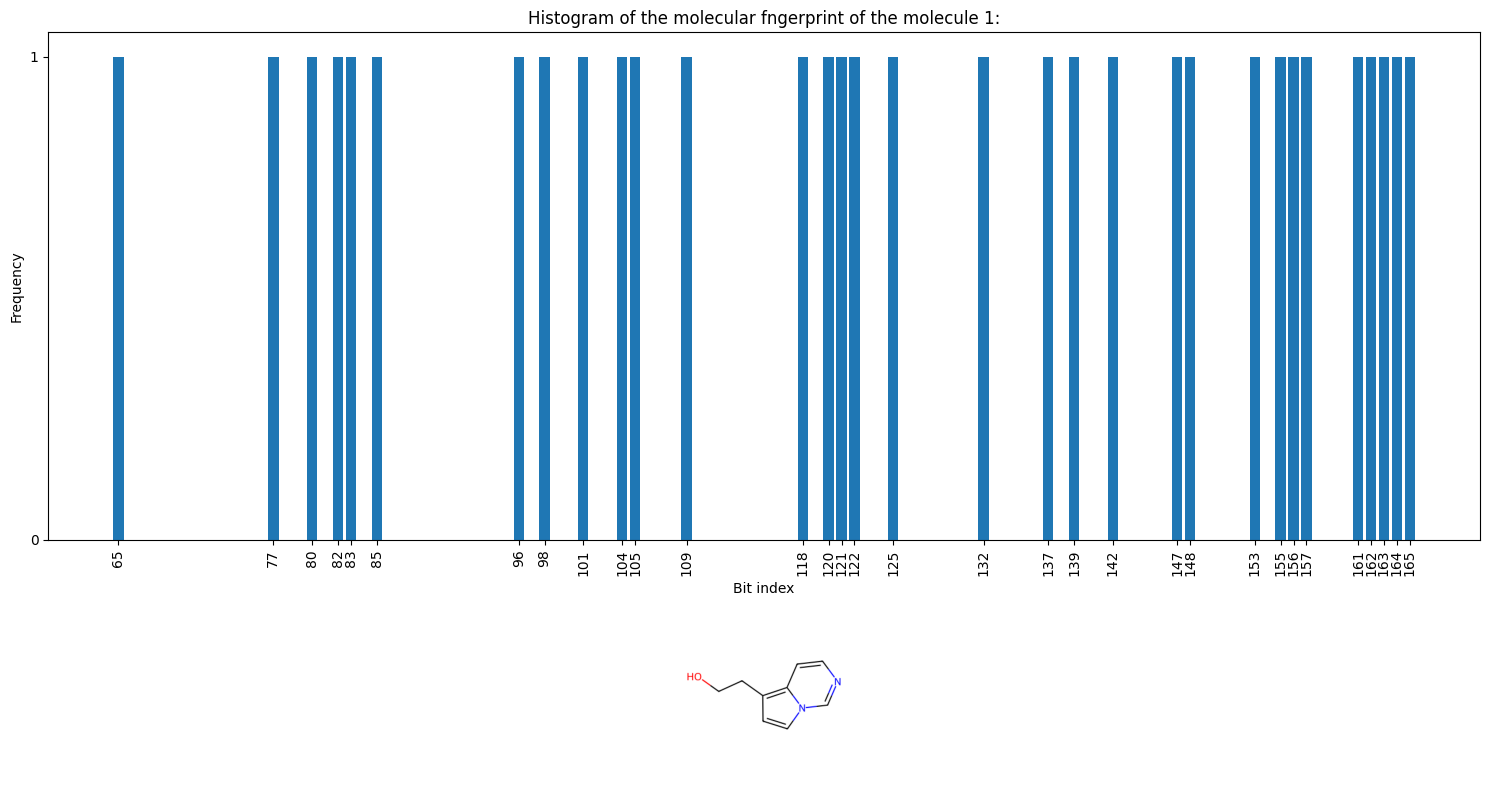

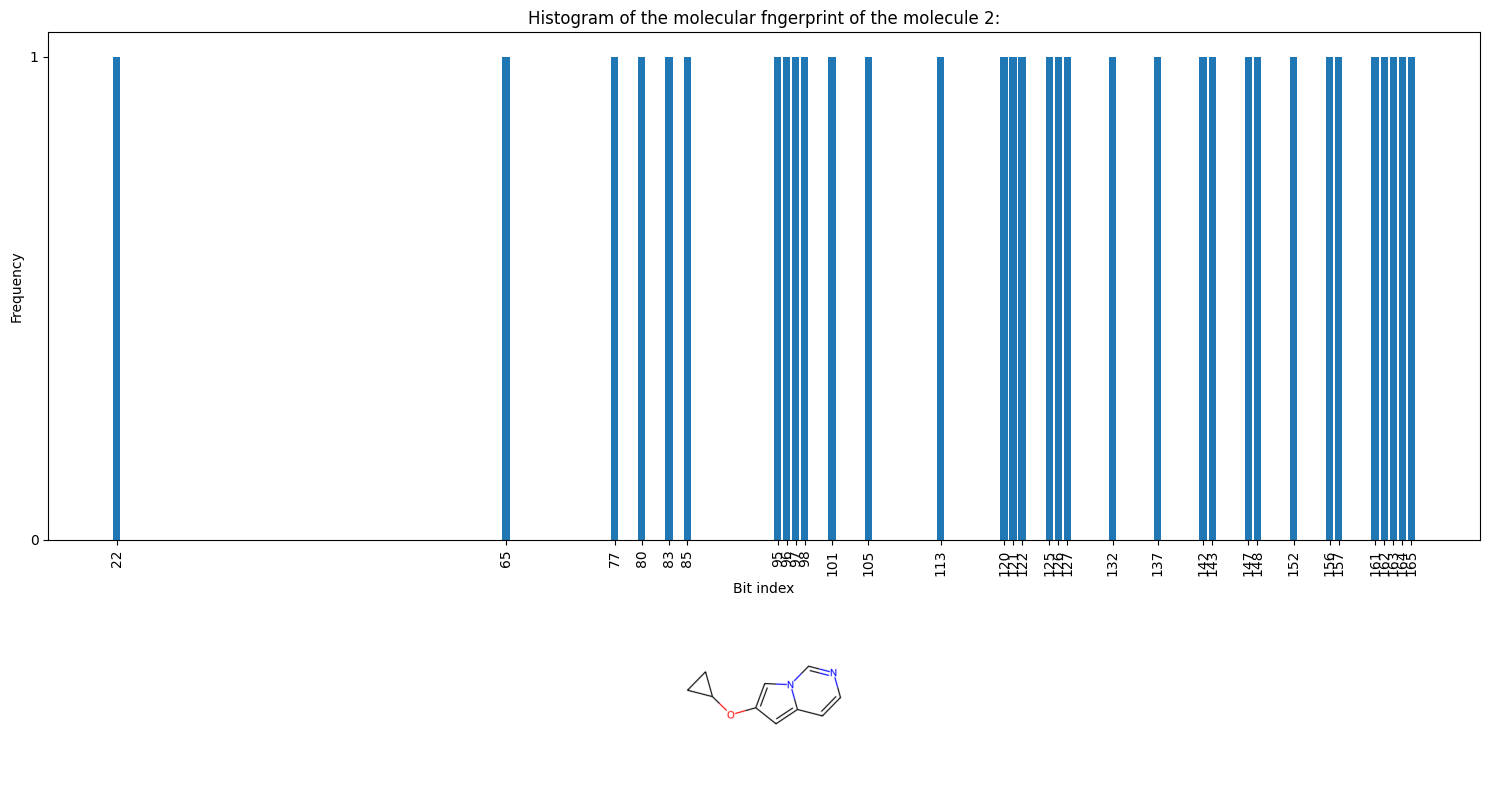

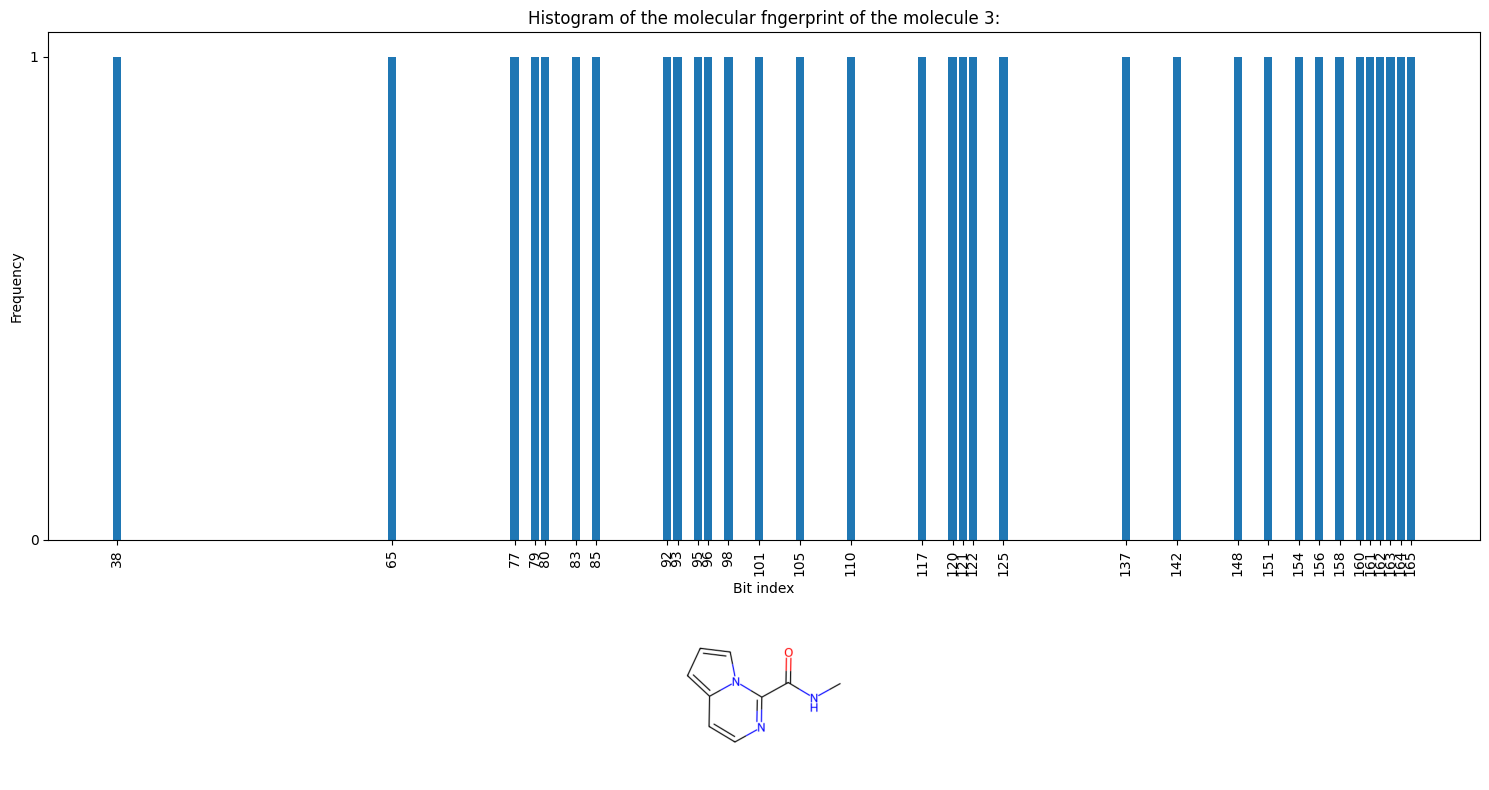

In [ ]:
mol_images = [Draw.MolToImage(mol, size=(300, 300)) for mol in mol_list]

active_fps_visualization(fps=fps,mol_images=mol_images)

<a name='2.2.1B'></a>

#### **B - PubChem**
It has 881 structural keys. These are used by PubChem for the search by similarity and neighbors. It is implemented in ChemFP and CDK. Next, an example of the code in which we establish the use of fingerprints from PubChem.

In [ ]:
# Name or ID of the compounds you wish to search
compound_name = "aspirin"

# Made a search in PubChem
compounds = pcp.get_compounds(compound_name, 'name')
if compounds:
    # Get the first result (there can be multiple results)
    compound = compounds[0]
    # Get the molecular fingerprint from PubChem
    fingerprint = compound.fingerprint
    no_zero_positions = {}
    # List the string and add the position with no zero values to a dictionary
    for i, valor in enumerate(fingerprint):
        if valor != '0':
            no_zero_positions[i] = valor

    print(f"Name of the compound: {compound.synonyms[0]}")
    print(f"List of active bits(position:value)= {no_zero_positions}")
    print(f"PubChem fingerprint: {fingerprint}")

else:
    print(f"Couldn´t get results for '{compound_name}'.")

Name of the compound: aspirin
List of active bits(position:value)= {5: '3', 6: '7', 7: '1', 8: 'C', 10: '7', 12: '3', 13: '8', 52: '3', 71: '1', 78: '1', 79: 'A', 85: '8', 91: 'C', 93: '4', 94: '8', 96: '9', 97: '8', 100: '3', 101: '2', 103: 'E', 104: '8', 109: '6', 112: '8', 113: '8', 115: '2', 116: '2', 118: 'D', 119: '2', 121: '8', 125: '2', 127: '8', 130: '2', 131: '4', 132: '2', 137: '8', 138: '8', 139: '8', 141: '1', 143: '6', 145: '8', 146: 'C', 147: '8', 149: 'C', 150: '2', 151: '7', 152: '3', 153: '6', 154: '8', 155: '4', 156: '3', 157: '5', 158: '1', 159: 'A', 160: '8', 161: '2', 162: '7', 163: 'B', 164: '6', 166: 'A', 167: '5', 168: 'E', 170: '1', 171: '1', 173: '8', 174: 'B', 175: '9', 176: '8', 177: '7', 178: '8', 179: '8', 180: 'C', 181: '8', 182: '2', 184: '8', 185: 'E', 197: '8', 212: '1'}
PubChem fingerprint: 00000371C0703800000000000000000000000000000000000000300000000000000000010000001A00000800000C04809800320E80000600880220D208000208002420000888010608C80C273684351A82

<a name='2.2.2'></a>

### 2.2.2 - Topological or path based
Topological signatures are generated through encoding the connectivity or general shape of the molecule, without explicitly encoding specific substructures (depending on the molecule). They work by analyzing all the fragments of the molecule following a usually linear path until certain number of bonds, and after merging each of these paths (sequences of atoms or bonds) to create a molecular fingerprint. The above means that any molecule can produce a significant molecular fingerprint, and its length can be adjusted. They are commonly used to make a quick search and substructure filtering.  We must take into account that a single bit can’t be traced to a certain characteristic and a determinate bit can be set to more than one different characteristic (bit collision). Most of the software uses these molecular fingerprints or are based on this. Daylight is the most common example of this type of molecular fingerprint.
Below, there is an example of a code that establishes the use of topological molecular fingerprints.


In [ ]:
# Create a molecule from a SMILES
smiles = list_of_smiles[0]
mol_list = [Chem.MolFromSmiles(s) for s in ['CCOC', 'CCO', smiles]]
fpgen = AllChem.GetRDKitFPGenerator() #We start with a fps generator
fingerprints = [fpgen.GetFingerprint(mol) for mol in mol_list]
# Print information of each fingerprint información de cada huella molecular
for idx, fp in enumerate(fingerprints, start=1):
    print(f"Molecule {idx}:")
    print(f"Topological fingerprint: {fp.ToBitString()}")
    print(f"List of active bits: {list(fp.GetOnBits())}\n")
get_similarity_matrix(fingerprints)

Molecule 1:
Topological fingerprint: 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

,1,2,3
1,1.000,0.600,0.013
2,0.600,1.000,0.013
3,0.013,0.013,1.000


<a name='2.2.2.1'></a>

#### **Circular fingerprints**
Circular signatures also belong to the topological type; however, they are somewhat different since these do not focus on path findings, but in the environment of each atom until a determinate radius. These are not suitable for substructure searches but are suitable for complete structural similarity searches.

<a name='2.2.2A'></a>

#### **A - ECFP, Extended-Connectivity Fingerprints**
The circular molecular fingerprint is based on the Morgan algorithm and is the standard, which was specifically designed for its use in structure-activity modeling. They represent the circular atomic neighborhood and produce a length variable molecular fingerprint. They are commonly used considering  a 4 Å  diameter (ECFP4) and 6 Å (ECFP6). Multiple software calculates this molecular fingerprint: Pipeline Pilot, Chemaxon’s JChem, CDK y RDKit.
Next, an example of a code in which we establish the use of circular molecular fingerprint.


In [ ]:
def get_Morgan_fps(smiles_list, radius, nBits):

    # Create a molecule from a SMILES
    mol_list = [Chem.MolFromSmiles(s) for s in smiles_list]
    fpgen = AllChem.GetMorganGenerator(radius=radius, fpSize = nBits) #Generated with x radius
    fingerprints = [fpgen.GetFingerprint(mol) for mol in mol_list]
    # Print information of each fingerprint
    for idx, fp in enumerate(fingerprints, start=1):
        print(f" Molecule {idx}:")
        print(f"  Molecular fingerprint: {fp.ToBitString()}")
        print(f"   List of active bits: {list(fp.GetOnBits())}")

    print("Similarity matrix")
    return get_similarity_matrix(fingerprints)

In [ ]:
# Generate the ECFP4 (with 2 radius)
get_Morgan_fps(smiles_list=list_of_smiles, radius=2, nBits=2048) #ECFP4

 Molecule 1:
  Molecular fingerprint: 00000000000000000000000000000000000000000000010000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001010000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000010000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100100000000000000000000000000

,1,2,3
1,1.000,0.255,0.157
2,0.255,1.000,0.170
3,0.157,0.170,1.000


In [ ]:
# Generate the ECFP6 (with 3 radius)
get_Morgan_fps(smiles_list=list_of_smiles, radius=3, nBits=2048) #ECFP6

 Molecule 1:
  Molecular fingerprint: 00000000000000000000000000000000000000000000010000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001010000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000100000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000001000000000100000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010100000000000000000000000000000000000000000000000010000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100100000000000000000000000000

,1,2,3
1,1.000,0.203,0.116
2,0.203,1.000,0.123
3,0.116,0.123,1.000


<a name='2.2.2B'></a>

#### **B - FCFP, Functional-Class Fingerprints**

They are a variant of the ECFP, but more abstract and instead of indexing a particular atom in the environment, they index the role of the atom. So different atoms or groups with the same or similar functions are not distinguishable for the molecular fingerprint. Above, allows them to be used as pharmacophoric molecular fingerprints. Most of the software that supports ECFP also supports this variable.

In [ ]:
#ESTO NO ESTA BIEN
# Create a molecule from a SMILES
smiles = aspirin_smiles
mol = Chem.MolFromSmiles(smiles)

if mol is not None:
    # Set parameters for the FCFP
    radius = 2  # Adjust radius
    nBits= 2048
    use_features = True  # Index the rol of the atom

    # Generate the FCFP
    fpgen = AllChem.GetMorganGenerator(radius=radius, fpSize = nBits)
    fingerprints = [fpgen.GetFingerprint(mol) for mol in mol_list]

    print(f"List of active bits in FCFP: {list(fp.GetOnBits())}\n")
    print(f"FCFP : {fp.ToBitString()}")
else:
    print("A molecule couldn't be created from the given SMILES.")

List of active bits in FCFP: [0, 1, 5, 11, 18, 21, 26, 32, 34, 36, 46, 51, 52, 55, 60, 65, 66, 69, 71, 80, 81, 85, 90, 93, 97, 98, 103, 104, 105, 109, 113, 117, 122, 134, 140, 142, 143, 145, 147, 149, 157, 160, 161, 168, 171, 172, 177, 182, 189, 194, 195, 201, 202, 219, 220, 225, 254, 267, 282, 285, 292, 294, 296, 297, 298, 301, 303, 305, 314, 318, 330, 340, 341, 342, 355, 371, 373, 383, 386, 388, 390, 391, 399, 402, 406, 423, 430, 441, 444, 460, 464, 469, 471, 472, 479, 485, 489, 497, 501, 502, 508, 509, 510, 520, 522, 534, 535, 536, 561, 562, 566, 569, 572, 573, 587, 598, 602, 608, 611, 612, 616, 618, 624, 626, 632, 633, 639, 640, 642, 644, 658, 661, 669, 671, 674, 675, 676, 684, 690, 694, 698, 716, 717, 720, 737, 742, 744, 755, 759, 762, 764, 765, 768, 772, 773, 780, 791, 792, 800, 813, 819, 824, 826, 828, 830, 838, 841, 842, 843, 848, 850, 853, 854, 855, 857, 858, 861, 865, 866, 879, 898, 900, 902, 905, 911, 915, 918, 923, 927, 929, 930, 932, 934, 935, 946, 951, 954, 955, 965, 966,

<a name='3'></a>
# *3. Exercise with a database*
---

In [ ]:
# Read a file
url = 'https://github.com/DIFACQUIM/Cursos/raw/main/Datasets/Fingerprints.csv'
df = pd.read_csv(url)
df.head()

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')
df['ROMol_H'] = [Chem.AddHs(m) for m in df['ROMol']]
df

The following code generates molecular fingerprints (ECFP6, MACCS, 2D and 3D pharmacophoric) for each molecule in a dataframe.
As a parameters we have:
 * Dataframe: (`pd.dataframe`) a dataframe with a column of RDKit molecules
 * Column (`Str`) name of the column with the RDKit molecules
 It returns a pd.DataFrame with new columns of fingerprints

In [ ]:
def fingerprint(dataframe, column="ROMol_H"):

    tic = time.time()
    factory = Gobbi_Pharm2D.factory  # Definition of the 2D pharmacophore
    fpgen = AllChem.GetMorganGenerator(radius=3, fpSize=1024)  # ECFP6 generator

    ecfp6_list, maccs_list, fp2d_list, fp3d_list = [], [], [], []

    for mol in dataframe[column]:
        if mol is None:  # Management of invalid molecules
            ecfp6_list.append(None)
            maccs_list.append(None)
            fp2d_list.append(None)
            fp3d_list.append(None)
            continue

        # Generate molecular fingerprints
        ecfp6_list.append(fpgen.GetFingerprint(mol))
        maccs_list.append(MACCSkeys.GenMACCSKeys(mol))

        # Generate a 2D pharmacophoric
        fp2d_list.append(Pharm2D.Generate.Gen2DFingerprint(mol, factory))

        # Generate a 3D pharmacophoric
        AllChem.EmbedMolecule(mol, useRandomCoords=True)  # Avoid conformational errors
        matriz_3d = Chem.Get3DDistanceMatrix(mol)
        fp3d_list.append(Pharm2D.Generate.Gen2DFingerprint(mol, factory, dMat=matriz_3d))

    # Asign lists to the DataFrame
    dataframe["ECFP6"] = ecfp6_list
    dataframe["MACCS"] = maccs_list
    dataframe["Fp2D"] = fp2d_list
    dataframe["Fp3D"] = fp3d_list
    tac = time.time()
    print(f" Amount of time: {round((tac-tic)/60, 2)}")
    return dataframe

In [ ]:
fingerprint(dataframe=df)

---
# For more information:


* Gallegos Saliner A. 2006. “Mini-Review on Chemical Similarity and Prediction of Toxicity.” Current Computer-Aided Drug Design 2 (2): 105–22.
* Maggiora, Gerald, Martin Vogt, Dagmar Stumpfe, and Jürgen Bajorath. 2014. “Molecular Similarity in Medicinal Chemistry.” Journal of Medicinal Chemistry 57 (8): 3186–3204.
* Naveja, J. Jesús, Fernanda I. Saldívar-González, Norberto Sánchez-Cruz, and José L. Medina-Franco. 2019. “Cheminformatics Approaches to Study Drug Polypharmacology.” In Multi-Target Drug Design Using Chem-Bioinformatic Approaches, edited by Kunal Roy, 3–25. New York, NY: Springer New York.
* A.h.-L., and Y.g.s. 1992. “Concepts and Applications of Molecular Similarity.” Journal of Molecular Structure 269 (3-4): 376–77.
* Cereto-Massagué, Adrià, María José Ojeda, Cristina Valls, Miquel Mulero, Santiago Garcia-Vallvé, and Gerard Pujadas. 2015. “Molecular Fingerprint Similarity Search in Virtual Screening.” Methods 71 (January): 58–63.